In [205]:
import pandas as pd 
import numpy as np
#impot counter 
from collections import Counter
# import matplotlib
import matplotlib.pyplot as plt
# seaborn import 
import seaborn as sns



from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from ete3 import Tree

from scipy.cluster.hierarchy import linkage, dendrogram, to_tree
from ete3 import Tree, TreeStyle, faces, AttrFace

In [206]:
rank1 = pd.read_csv('kinase_ranked_1.csv')
rank1.head()

Uniprot Primary Accession     Protein Phosphosite     SITE_+/-7_AA ranked_1
0                A0A0B4J1R7  A0A0B4J1R7          T6  __MMATGTPESQARF     AAK1
1                A0A1B0GUI2  A0A1B0GUI2        T185  KTPTLQPTPEVHNGL     AAK1
2                A0A1B0GUI2  A0A1B0GUI2        T763  RRLSSASTGKPPLSV     AAK1
3                    A6H8Y1        BDP1       T2081  EKVKENATPTRNTIS     AAK1
4                    A6NC98       CC88B       T1366  EGREADGTGSPSPAP     AAK1

In [207]:
human = pd.read_csv('Kinase_Substrate_Dataset_human.txt', sep='\t')
human.head()

GENE KINASE KIN_ACC_ID KIN_ORGANISM   SUBSTRATE  SUB_GENE_ID SUB_ACC_ID  \
0  EIF2AK1    HRI     Q9BQI3        human  eIF2-alpha       1965.0     P05198   
1  EIF2AK1    HRI     Q9BQI3        human  eIF2-alpha       1965.0     P05198   
2    PRKCD   PKCD     Q05655        human       HDAC5      10014.0     Q9UQL6   
3    PRKCD   PKCD     Q05655        human  PTPRA iso2       5786.0   P18433-2   
4    PRKCD   PKCD     Q05655        human       Bcl-2        596.0     P10415   

  SUB_GENE SUB_ORGANISM SUB_MOD_RSD  SITE_GRP_ID     SITE_+/-7_AA DOMAIN  \
0   EIF2S1        human         S52       447635  MILLsELsRRRIRsI     S1   
1   EIF2S1        human         S49       450210  IEGMILLsELsRRRI     S1   
2    HDAC5        human        S259       447995  FPLRkTAsEPNLKVR    NaN   
3    PTPRA        human        S204       447612  PLLARSPsTNRKYPP    NaN   
4     BCL2        human         S70       448395  RDPVARtsPLQtPAA    NaN   

  IN_VIVO_RXN IN_VITRO_RXN                       CST_CAT#  
0                        X  3597; 9721; 3398; 5199; 53085  
1                        X                            NaN  
2                        X                           3443  
3           X                                         NaN  
4           X                                  2834; 2827

In [208]:
scop3p = pd.read_csv('UnknownKinaseMotif.txt', sep='\t')
scop3p.head()

KIN_ACC_ID  SUB_ACC_ID  score Family    GENE  UP_POS           +/-7AA
0     Q5S007  A0A0A6YYL3    307   LRRK   LRRK2     365  NSQPEKMSQEPEINK
1     Q5S007  A0A0A6YYL3    307   LRRK   LRRK2     490  EDLLRENSMLREEIA
2     O43318      A0AUZ9    540    MLK  MAP3K7     756  LSRIQNSSRNTARRR
3     O14578      A0AV96    270   DMPK     CIT     453  IPAIGAQYSMFPAAP
4     O14578      A0AV96    270   DMPK     CIT     519  PFQGRPITPVYTVAP

In [209]:
len(set(rank1['ranked_1']).intersection(set(human['GENE'])))

147

In [210]:
len(set(rank1['ranked_1']).intersection(set(human['KINASE'])))

238

In [211]:
def create_pssm(df, kinase_col, sequence_col, limited_family = True, verbose = True):

    #capitalize evreything in the sequence_col column
    df[sequence_col] = df[sequence_col].str.upper()

    # Group by 'KINASE_psp' and combine all sequences into a list
    kinase_sequences = df.groupby(kinase_col)[sequence_col].apply(list)

    # Initialize an empty dictionary to store the Logos for each kinase
    data_store = {}

    # For each kinase, create a position frequency matrix and then a sequence logo
    for kinase, sequences in kinase_sequences.items():
        if kinase not in need_family and limited_family:
            # print(f"kinase {kinase} is not here") 
            continue 
        if verbose: 
            print(f"for {kinase} all the sequences are {kinase_sequences[kinase]}")

        # Combine sequences into a single string for each position
        try: 
            aligned_sequences = [''.join(seq) for seq in zip(*sequences)]
            if len(aligned_sequences) != 15:
                continue
        except:
            continue
        
        # Create a DataFrame where each row corresponds to one position
        position_df = pd.DataFrame([Counter(pos) for pos in aligned_sequences]).fillna(0)
        
        # Normalize the counts to get frequencies
        position_freq_matrix = position_df.div(position_df.sum(axis=0), axis=1)
        
        data_store[kinase] = position_freq_matrix
    # print(data_store)

    return data_store

In [212]:
human['SITE_+/-7_AA'].str.upper()

0        MILLSELSRRRIRSI
1        IEGMILLSELSRRRI
2        FPLRKTASEPNLKVR
3        PLLARSPSTNRKYPP
4        RDPVARTSPLQTPAA
              ...       
13728    QRVLDTSSLTQSAPA
13729    DTSSLTQSAPASPTN
13730    LAQPINFSVSLSNSH
13731    ESSPILTSFELVKVP
13732    THRRMVVSMPNLQDI
Name: SITE_+/-7_AA, Length: 13733, dtype: object

In [213]:
# all_sequences = sorted({c for c in human['SITE_+/-7_AA'].str.upper().str.cat() })
# all_sequences

In [138]:
all_sequences = ['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y',
 '_']

In [214]:
johnson = create_pssm(rank1, 'ranked_1', 'SITE_+/-7_AA', limited_family = False)

for AAK1 all the sequences are ['__MMATGTPESQARF', 'KTPTLQPTPEVHNGL', 'RRLSSASTGKPPLSV', 'EKVKENATPTRNTIS', 'EGREADGTGSPSPAP', 'EQVANGPTPPPRRQL', 'QNSNSQSTPGSSGQR', 'KDLLFQKSPQNHRPP', 'VETFANKSGQSALYD', 'VILGLLKTPAQYDAS', 'KDLLFQKSPQNHRPP', 'SAGPNSPTGGGGGGG', 'QNSNSQSTPGSSGQR', 'SVIIADQTPTPTRFL', 'IELAKEWTPAGKAKQ', 'GSVVPGSSGVGTPRQ', 'KSITILSTPEGTSAA', 'EPTPAQKTPAKVVYV', 'QNTRLQPTPPIPAPA', 'SPVEAEGTPEPGAEA', 'FSTQGTPSGSPFPSQ', 'ASVAQSRSGPLSPAA', 'HVTTAEGTPGTTDQE', 'RALPSLNTGSSSPRG', 'NDVLAVNTPKDAAQQ', 'SPRTLSPTPSAEGYQ', 'SEVSGSGSGNFGEEG', 'RSVAEQHTPVCSRFS', 'DLLAALPTPPHNQTE', 'ESSPQHPTPPARPRH', 'AAPEPERTPVGQGSW', 'FQRVLESTPNNGYLY', 'AVIKEWGTGRDTLRC', 'SSRLENTTPTQPLTP', 'LARTPSPTPQPTSPQ', '___MADKTPGGSQKA', 'PAPSAQPTPPSASVP', 'LSQAASPTGASRSVR', 'SSSSSSGTPASQLYP', 'LSVRLGPSGSAQCLS', 'VSQISVLSGGKAKCS', 'VVLGKDASGQPIFNA', 'PVPETTPTPPTKTGT', 'MASRKEGTGSTATSS', 'RTQTESSTPPGIPGG', 'VYSAPRSTGPGASLG', 'QVVGRAGTGVDNVDL', 'NSLLSKKTGSPGSPG', 'PPPQPQHTPSPAAPP', '_MSRPSSTGPSANKP', 'PYIVLSGSGKSMNAN',

In [215]:
psp = create_pssm(human, 'KINASE', 'SITE_+/-7_AA', limited_family=False)

for AAK1 all the sequences are ['SQITSQVTGQIGWRR', 'LRVVDEKTKDLIVDQ']
for ADCK5 all the sequences are ['YQPRRRKSVKNGQAE']
for ALK all the sequences are ['TAPGAGHYEDTILKS', 'GHTSNNIYEAVKYSE', 'FGMARDIYRASYYRK', 'RRPGEKTYTQRCRLF', 'RVVACNLYPFVKTVA', 'DPGSAAPYLKTKFIC', 'REDSARVYENVGLMQ', 'LVKGEGLYADPYGLL', 'AFSRVQIYHNPTANS', 'SKRKGHEYTNIKYSL', 'QVPQQPTYVQALFDF']
for ALK1 all the sequences are ['STNHSIGSTQSTPCS', 'ASSESSSTNHSIGST', 'TQSTPCSTSSMA___', 'HSIGSTQSTPCSTSS']
for ALK4 all the sequences are ['PKTYVDLTNEETTDS', 'VDLTNEETTDSTTSK']
for AMPKA1 all the sequences are ['SKLPLTRSHNNFVAI', 'KKVAVVRTPPKSPSS', 'GNPFDSKTEQGPQVD', 'QSIPRSASYPCAAPR', 'SARKRSASADNLTLP', 'RPLARVTSLANLISP', 'QHLRLSTSSGRLLYA', 'YGAQTVRSTMNFKIG', 'DTNSKKQSDTHLEET', 'IVFVRFNSSHGFPVE', 'SSLRPARSVPSIAAA', 'GTATPQRSGSVSNYR', 'VKLSSKLSAVSLRGI', 'RPLSRTQSSPLPQSP', 'LMRRSTVSLLDTYQK', 'HNYKVVVTVHGEIDP', 'TVHQRIASWQNLGAV', 'GAKRVIISAPSADAP', 'CNLSRVDSTTCLFPV', 'VPVARKLSAREQRDC', 'TSRIRTQSFSLQERQ', 'LARRRKATQVGEKTP', 'LHIRSSM

In [240]:
type(psp)

dict

In [216]:
scop3p.columns  

Index(['KIN_ACC_ID', 'SUB_ACC_ID', 'score', 'Family', 'GENE', 'UP_POS',
       '+/-7AA'],
      dtype='object')

In [217]:
scop3p_pssm = create_pssm(scop3p, 'GENE', '+/-7AA', limited_family=False)

for AAK1 all the sequences are ['NVQPPKSSPVVSTVL', 'SGSSSTRTPPTANHP', 'SSTRTPPTANHPVEP', 'ERNILPMTPVWAPVP', 'DLKKLNCSPDSFRCT', 'SPTGGRVSVFQTQLP', 'LRDSRPLSPILHIVK', 'RGGKRAMSDLELRQC', 'AKKKPPPSREKKVTR', 'NSGFDVLYHNMKHGQ', 'KKEKDAESVECPDAD', 'VECPDADSLNIPDVD', 'PDVDEEGYSIKPETN', 'YSSSDSDSEDEEPKK', 'SLDELKVSIGNITLS', 'KVSIGNITLSPAISR', 'SIGNITLSPAISRHS', 'ITLSPAISRHSPVQM', 'SPAISRHSPVQMNRN', 'VQMNRNLSNEELTKS', 'SSSARPTTPLSVGTI', 'KLTSGKLSGINEIPR', 'NEIPRPFSPPVTSNT', 'RPFSPPVTSNTSPPP', 'PFSPPVTSNTSPPPA', 'SPPVTSNTSPPPAAP', 'PPVTSNTSPPPAAPL', 'PLARAESSSSISSSA', 'ARAESSSSISSSASL', 'SSISSSASLSAANTP', 'VGVSRGPSPVSLGNQ', 'VSLGNQDTLPVAVAL', 'HRRVEHGSGLTRTPS', 'VEHGSGLTRTPSSEE', 'HGSGLTRTPSSEEIS', 'SGLTRTPSSEEISPT', 'GLTRTPSSEEISPTK', 'TPSSEEISPTKFPGL', 'SSEEISPTKFPGLYR', 'LYRTGEPSPPHDILH', 'HEPPDVVSDDEKDHG', 'KEKRTEGYAAFQEDS', 'YAAFQEDSSGDEAES', 'AAFQEDSSGDEAESP', 'IHVFKKPSFSKKKEK', 'KIAQEIASLSKEDVS', 'AQEIASLSKEDVSKE', 'GKEPAKPSPSRDRKE', 'MGPERHLSGAPARMA', 'ALQARQASPAWK', 'RDEATILTGMLIGLS', 'T

In [218]:
common_gene = set(scop3p_pssm.keys()).intersection(set(psp.keys())).intersection(set(johnson.keys()))

In [219]:
print(f"common gene {common_gene}")

common gene {'PAK4', 'PRKD2', 'CAMK1G', 'TLK1', 'MAPKAPK5', 'PAK6', 'DYRK4', 'NEK1', 'CLK4', 'MARK2', 'PRKD1', 'WNK3', 'TTBK2', 'VRK2', 'PRKD3', 'PKN2', 'CDK13', 'HIPK3', 'SGK3', 'HUNK', 'HIPK1', 'WNK4', 'LATS1', 'MAPKAPK2', 'MASTL', 'NEK3', 'MARK3', 'DAPK2', 'MAPKAPK3'}


In [221]:
len(set(scop3p_pssm.keys()).intersection(set(psp.keys())).intersection(set(johnson.keys())))

29

In [222]:
def add_missing_columns(pssm1):
    for col in all_sequences:
        if col not in pssm1.columns:
            pssm1[col] = -1
    return pssm1

In [225]:
columns_to_keep = ['-5P',
 '-5G',
 '-5A',
 '-5C',
 '-5S',
 '-5T',
 '-5V',
 '-5I',
 '-5L',
 '-5M',
 '-5F',
 '-5Y',
 '-5W',
 '-5H',
 '-5K',
 '-5R',
 '-5Q',
 '-5N',
 '-5D',
 '-5E',]

In [241]:
def convert_to_normalize_matrix(pssm, suffix = '', only_common_gene = False, common_gene = common_gene): 
    # Flatten the DataFrame
    flattened_data = {}
    for family_name, df in pssm.items():
        if not only_common_gene: 
            df = add_missing_columns(df)
            df['position'] = range(-7, 8)
            df.set_index('position', inplace=True)
            # sort the columns 
            df = df[sorted(df.columns)]
            flattened_df = df.unstack().reset_index()
            flattened_df['feature'] = flattened_df['position'].astype(str) + flattened_df['level_0']
            flattened_df = flattened_df[['feature', 0]].set_index('feature').T
            flattened_data[family_name] = flattened_df
        else:
            if family_name not in common_gene:
                continue
            df = add_missing_columns(df)
            df['position'] = range(-7, 8)
            df.set_index('position', inplace=True)
            # sort the columns 
            df = df[sorted(df.columns)]
            flattened_df = df.unstack().reset_index()
            flattened_df['feature'] = flattened_df['position'].astype(str) + flattened_df['level_0']
            flattened_df = flattened_df[['feature', 0]].set_index('feature').T
            flattened_data[family_name] = flattened_df

    # Concatenate all families into a single DataFrame
    final_df = pd.concat(flattened_data.values(), keys=flattened_data.keys())

    # Reset index to have family names as a column
    final_df.reset_index(level=1, drop=True, inplace=True)
    final_df.reset_index(inplace=True)
    final_df.rename(columns={'index': 'Family'}, inplace=True)
    # add suffix to the Family column
    final_df['Family'] = final_df['Family'] + suffix

    final_df.set_index('Family', inplace=True)
    # final_df = final_df[columns_to_keep]

    # drop the feature column 
    # final_df.reset_index( inplace=True)
    # final_df.set_index('Family', inplace=True)
    sorted_column = sorted(final_df.columns, key=lambda x: int(x[:-1]))
    
    final_df =  final_df[sorted_column]
    #remove columns who is '_' in the column name
    final_df = final_df.loc[:, ~final_df.columns.str.contains('_')]

    return final_df

In [242]:
data_psp = convert_to_normalize_matrix(psp, suffix='_psp')

In [243]:
data_rank1 = convert_to_normalize_matrix(johnson, suffix='_johnson')

In [244]:
data_scop3p = convert_to_normalize_matrix(scop3p_pssm, suffix='_scop3p')   

In [245]:
# merge the dataframes
data = pd.concat([data_psp, data_rank1, data_scop3p])

In [246]:
data.to_csv('PSSM for dendogram.csv')


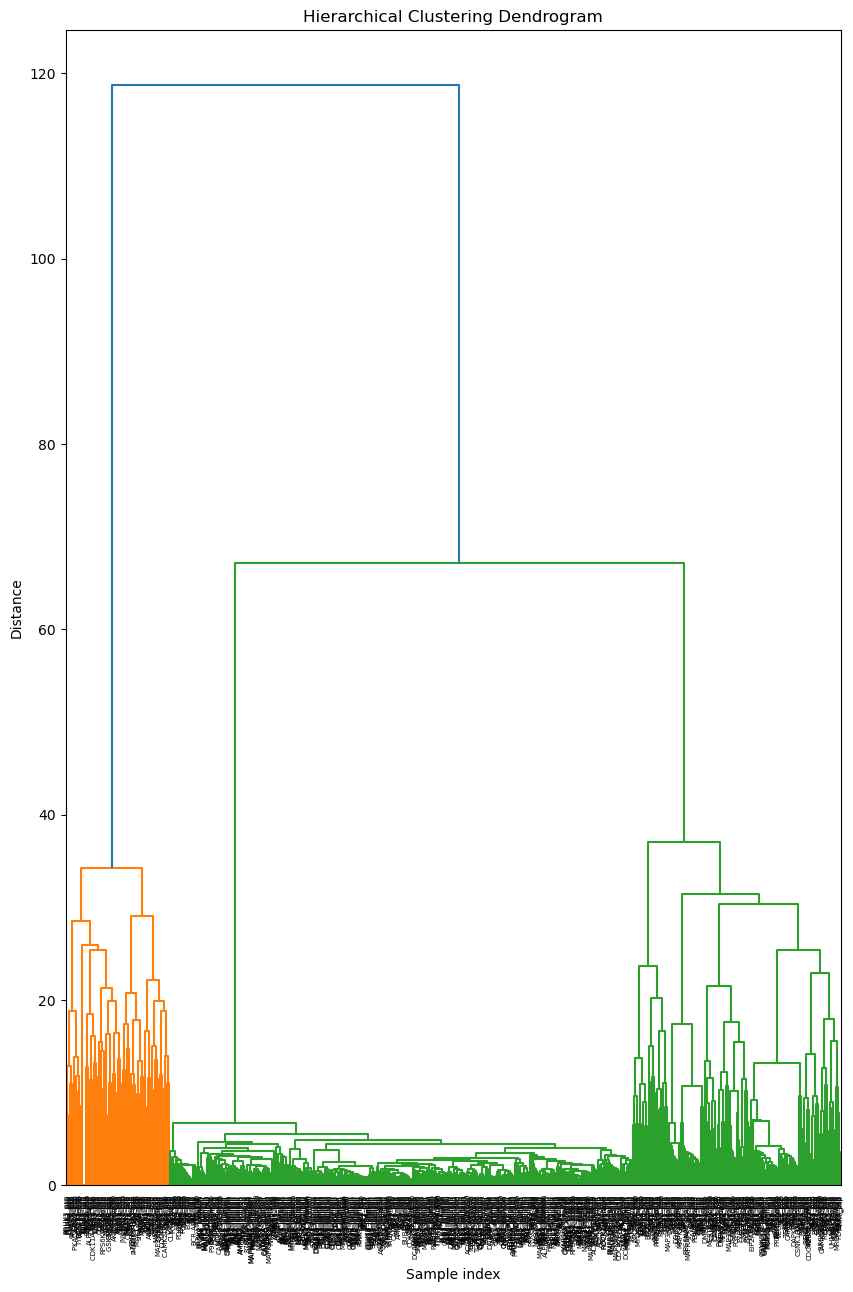

In [247]:
# Compute the linkage matrix using the first 20 columns
linkage_matrix = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 15))
dendrogram(linkage_matrix, labels=data.index.values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

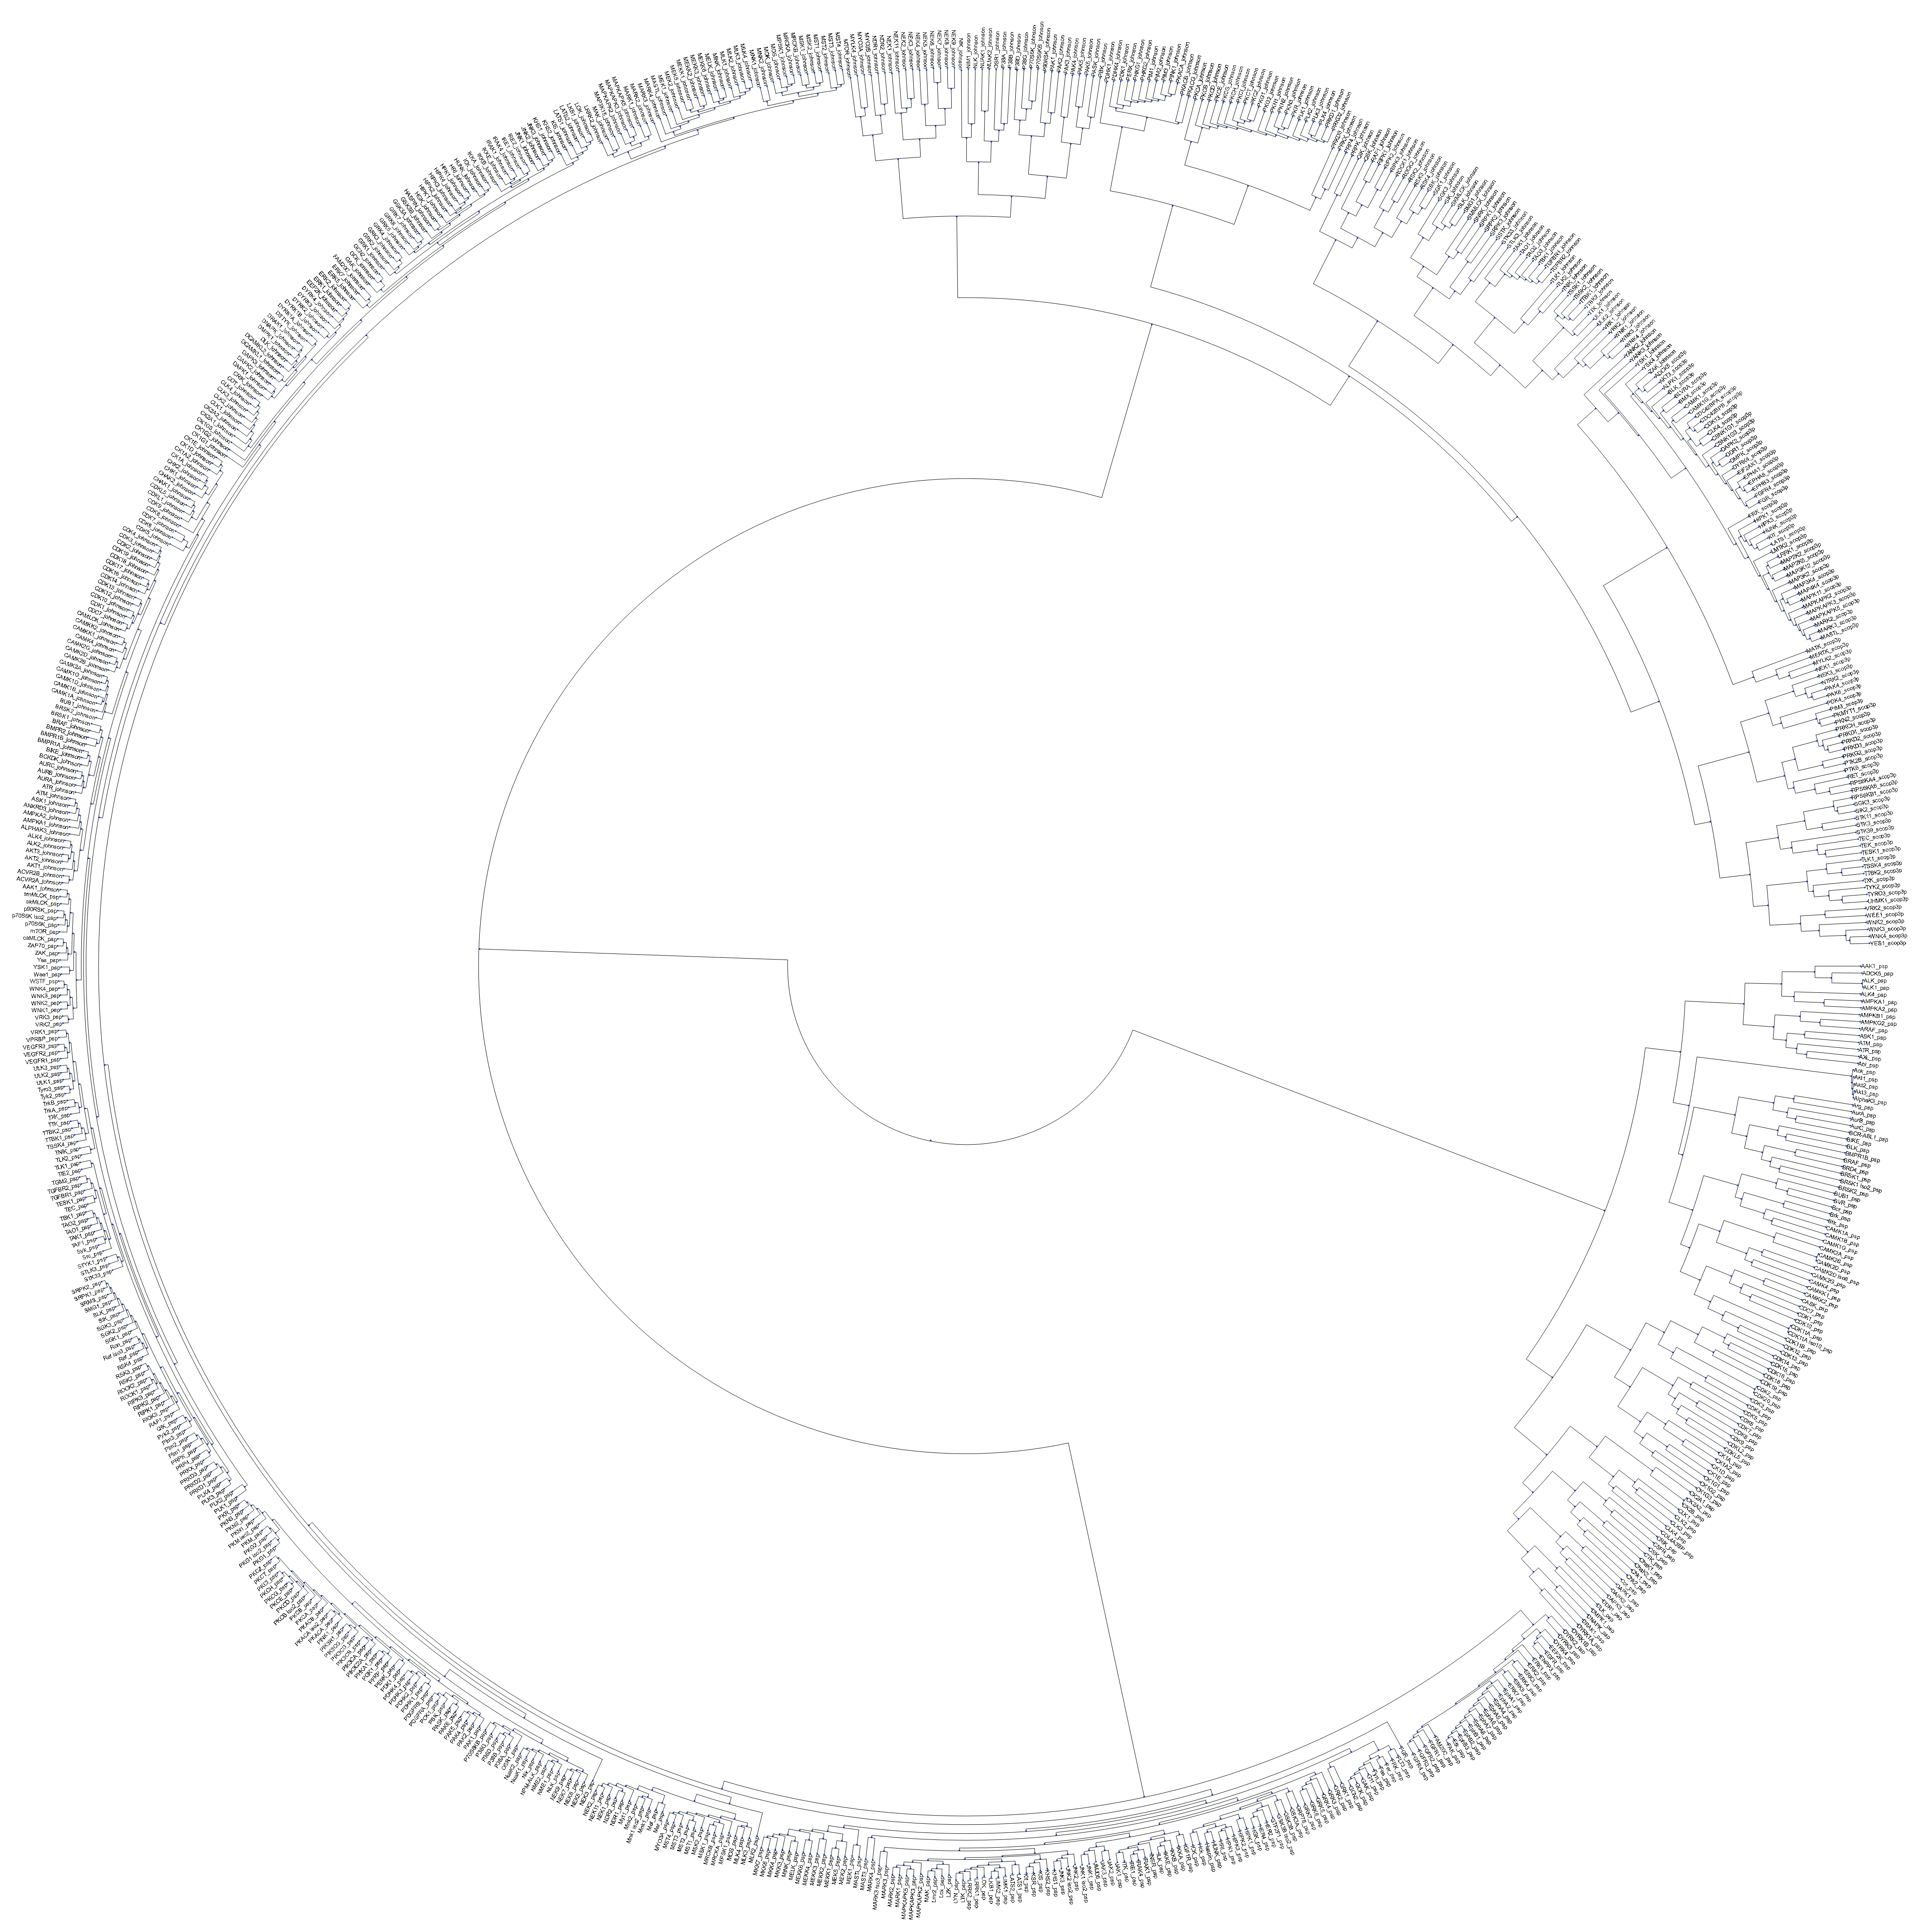

In [263]:

# Ensure the necessary libraries are installed
# !pip install scipy ete3 pandas matplotlib

# Reusing the previously computed linkage_matrix
# linkage_matrix = linkage(data_subset, method='ward') # Already computed

# Convert the linkage matrix to a Newick tree format
def convert_to_newick(linkage_matrix):
    def build_newick(node, parent_dist, leaf_names, newick=''):
        if node.is_leaf():
            return "%s:%f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
        else:
            if newick == '':
                newick = ');'
            else:
                newick = '):%f%s' % (parent_dist - node.dist, newick)
            newick = build_newick(node.get_right(), node.dist, leaf_names, newick)
            newick = build_newick(node.get_left(), node.dist, leaf_names, ',%s' % (newick))
            newick = '(%s' % (newick)
            return newick

    tree = to_tree(linkage_matrix)
    return build_newick(tree, tree.dist, list(map(str, range(len(data)))))

newick_tree = convert_to_newick(linkage_matrix)

# Load the Newick tree using ete3
t = Tree(newick_tree)

# Add leaf names
for i, leaf in enumerate(t.iter_leaves()):
    leaf.name = data.index.values[i]

# Create a TreeStyle for circular layout
ts = TreeStyle()
ts.mode = "c"
ts.show_leaf_name = True
ts.show_scale = False

# Render the tree
t.render("%%inline", tree_style=ts)


With common gene

In [264]:
data_psp_common = convert_to_normalize_matrix(psp, suffix='_psp', only_common_gene=True)
data_rank1_common = convert_to_normalize_matrix(johnson, suffix='_johnson', only_common_gene=True)
data_scop3p_common = convert_to_normalize_matrix(scop3p_pssm, suffix='_scop3p', only_common_gene=True)
data_common = pd.concat([data_psp_common, data_rank1_common, data_scop3p_common])
data_common


feature            -7A       -7C       -7D       -7E       -7F       -7G  \
Family                                                                     
CAMK1G_psp   -1.000000 -1.000000  0.000000 -1.000000  0.000000  0.000000   
CDK13_psp     1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CLK4_psp     -1.000000 -1.000000  0.500000  0.000000 -1.000000 -1.000000   
DAPK2_psp     0.000000  0.000000 -1.000000 -1.000000  0.000000  0.000000   
DYRK4_psp    -1.000000 -1.000000 -1.000000  1.000000  0.000000 -1.000000   
...                ...       ...       ...       ...       ...       ...   
TLK1_scop3p   0.047619  0.000000  0.111111  0.027027  0.000000  0.062500   
TTBK2_scop3p  0.033898  0.153846  0.045455  0.080645  0.000000  0.105263   
VRK2_scop3p   0.000000  0.000000  0.000000  0.333333 -1.000000  0.000000   
WNK3_scop3p   0.029412  0.000000  0.030303  0.090909  0.133333  0.100000   
WNK4_scop3p   0.066667  0.166667  0.078431  0.055556  0.058824  0.066667   

feature            -7H       -7I       -7K       -7L  ...      7M        7N  \
Family                                                ...                     
CAMK1G_psp   -1.000000 -1.000000  0.000000  0.000000  ...  0.0000  0.500000   
CDK13_psp    -1.000000 -1.000000 -1.000000 -1.000000  ... -1.0000 -1.000000   
CLK4_psp     -1.000000 -1.000000 -1.000000  0.000000  ... -1.0000 -1.000000   
DAPK2_psp    -1.000000  0.000000  0.000000  0.000000  ... -1.0000  0.000000   
DYRK4_psp     0.000000  0.000000  0.000000 -1.000000  ... -1.0000 -1.000000   
...                ...       ...       ...       ...  ...     ...       ...   
TLK1_scop3p   0.000000  0.000000  0.148148  0.107143  ...  0.0000  0.071429   
TTBK2_scop3p  0.043478  0.146341  0.088608  0.052632  ...  0.0000  0.170732   
VRK2_scop3p   0.000000  0.000000 -1.000000  0.000000  ... -1.0000  0.000000   
WNK3_scop3p   0.000000  0.058824  0.116279  0.023810  ...  0.0000  0.000000   
WNK4_scop3p   0.076923  0.062500  0.112676  0.118421  ...  0.0625  0.037037   

feature             7P        7Q        7R        7S        7T        7V  \
Family                                                                     
CAMK1G_psp   -1.000000 -1.000000  0.000000  0.000000  0.000000 -1.000000   
CDK13_psp     0.000000  0.000000  0.000000  0.142857  0.000000 -1.000000   
CLK4_psp      0.000000  0.000000  0.000000  0.500000  0.000000  0.000000   
DAPK2_psp     0.000000 -1.000000  0.000000  0.000000  0.000000  0.000000   
DYRK4_psp    -1.000000  0.000000  0.500000  0.000000  0.000000  0.000000   
...                ...       ...       ...       ...       ...       ...   
TLK1_scop3p   0.117647  0.083333  0.100000  0.055556  0.000000  0.095238   
TTBK2_scop3p  0.073171  0.068493  0.031250  0.052083  0.030000  0.024096   
VRK2_scop3p   0.222222  0.000000  0.000000  0.000000  0.000000  0.250000   
WNK3_scop3p   0.073171  0.037037  0.062500  0.065789  0.069767  0.050000   
WNK4_scop3p   0.019608  0.027027  0.021277  0.020202  0.089286  0.083333   

feature             7W        7Y  
Family                            
CAMK1G_psp   -1.000000 -1.000000  
CDK13_psp    -1.000000  0.000000  
CLK4_psp      0.000000 -1.000000  
DAPK2_psp     0.000000  0.000000  
DYRK4_psp    -1.000000  0.000000  
...                ...       ...  
TLK1_scop3p  -1.000000  0.000000  
TTBK2_scop3p  0.000000  0.125000  
VRK2_scop3p  -1.000000  0.000000  
WNK3_scop3p   0.333333  0.000000  
WNK4_scop3p   0.272727  0.105263  

[87 rows x 300 columns]

In [250]:
data_psp_common

feature            -7A       -7C       -7D       -7E       -7F       -7G  \
Family                                                                     
CAMK1G_psp   -1.000000 -1.000000  0.000000 -1.000000  0.000000  0.000000   
CDK13_psp     1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CLK4_psp     -1.000000 -1.000000  0.500000  0.000000 -1.000000 -1.000000   
DAPK2_psp     0.000000  0.000000 -1.000000 -1.000000  0.000000  0.000000   
DYRK4_psp    -1.000000 -1.000000 -1.000000  1.000000  0.000000 -1.000000   
HIPK1_psp     0.333333 -1.000000 -1.000000  0.000000 -1.000000  0.000000   
HIPK3_psp     0.000000  0.000000 -1.000000 -1.000000 -1.000000 -1.000000   
HUNK_psp      0.000000 -1.000000 -1.000000  0.000000 -1.000000  0.000000   
LATS1_psp     0.090909  0.000000  0.000000  0.250000  0.000000  0.000000   
MAPKAPK2_psp  0.040541  0.214286  0.060000  0.033898  0.047619  0.101695   
MAPKAPK3_psp  0.000000 -1.000000  0.000000  0.000000  0.000000  0.000000   
MAPKAPK5_psp  0.000000  0.000000  0.111111  0.000000  0.142857  0.100000   
MARK2_psp     0.000000  0.000000  0.000000  0.100000  0.375000  0.052632   
MARK3_psp     0.000000 -1.000000  0.000000  0.000000  0.000000  0.166667   
MASTL_psp     0.000000 -1.000000  0.000000 -1.000000  0.000000  0.000000   
NEK1_psp      0.000000  0.000000  0.125000  0.000000  0.000000  0.062500   
NEK3_psp      0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
PAK4_psp      0.043478  0.333333  0.095238  0.107143  0.000000  0.000000   
PAK6_psp      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
PKN2_psp      0.000000 -1.000000 -1.000000  0.000000  0.000000  0.000000   
PRKD1_psp     0.085106  0.000000  0.075000  0.150943  0.120000  0.145455   
PRKD2_psp     0.000000  0.000000  0.000000  0.266667  0.000000  0.181818   
PRKD3_psp     0.333333 -1.000000  0.000000  0.250000  0.000000  0.285714   
SGK3_psp      0.000000  0.000000  0.142857  0.000000  0.000000  0.166667   
TLK1_psp      0.000000 -1.000000  0.000000  0.200000  0.000000  0.000000   
TTBK2_psp     0.000000 -1.000000  0.142857  0.090909  0.000000  0.083333   
VRK2_psp      0.142857  0.000000  0.090909  0.090909  0.000000  0.000000   
WNK3_psp      0.000000 -1.000000  0.000000  0.000000  0.000000  0.000000   
WNK4_psp      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

feature            -7H       -7I       -7K       -7L  ...        7M        7N  \
Family                                                ...                       
CAMK1G_psp   -1.000000 -1.000000  0.000000  0.000000  ...  0.000000  0.500000   
CDK13_psp    -1.000000 -1.000000 -1.000000 -1.000000  ... -1.000000 -1.000000   
CLK4_psp     -1.000000 -1.000000 -1.000000  0.000000  ... -1.000000 -1.000000   
DAPK2_psp    -1.000000  0.000000  0.000000  0.000000  ... -1.000000  0.000000   
DYRK4_psp     0.000000  0.000000  0.000000 -1.000000  ... -1.000000 -1.000000   
HIPK1_psp    -1.000000  0.000000  0.000000  0.000000  ... -1.000000 -1.000000   
HIPK3_psp    -1.000000  0.000000  0.500000  0.000000  ... -1.000000 -1.000000   
HUNK_psp     -1.000000  0.000000  0.000000  0.000000  ... -1.000000 -1.000000   
LATS1_psp     0.083333  0.181818  0.133333  0.064516  ...  0.200000  0.142857   
MAPKAPK2_psp  0.117647  0.081081  0.120000  0.011111  ...  0.000000  0.032258   
MAPKAPK3_psp  1.000000  0.500000  0.000000  0.000000  ...  0.000000  0.000000   
MAPKAPK5_psp  0.000000  0.125000  0.181818  0.050000  ...  0.333333  0.000000   
MARK2_psp     0.090909  0.071429  0.115385  0.023256  ...  0.111111  0.117647   
MARK3_psp     0.000000  0.000000  0.000000  0.181818  ...  0.166667  0.000000   
MASTL_psp    -1.000000 -1.000000  0.333333 -1.000000  ...  0.000000  0.000000   
NEK1_psp      0.000000  0.000000  0.090909  0.055556  ...  0.000000  0.000000   
NEK3_psp      0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
PAK4_psp      0.000000  0.111111  0.096774  0.000000  ...  0.142857  0.000000   
PAK6_psp      0.333333 

In [251]:
data_rank1_common

feature                -7A       -7C       -7D       -7E       -7F       -7G  \
Family                                                                         
CAMK1G_johnson    0.238095  0.000000  0.000000  0.148148  0.090909  0.150000   
CDK13_johnson     0.075829  0.047619  0.075862  0.081395  0.066667  0.067437   
CLK4_johnson      0.058140  0.062500  0.140625  0.088496  0.030303  0.042553   
DAPK2_johnson     0.096386  0.062500  0.114943  0.122807  0.142857  0.095890   
DYRK4_johnson     0.097345  0.056818  0.068249  0.065041  0.074074  0.100000   
HIPK1_johnson     0.093750  0.111111  0.000000  0.066667  0.250000  0.026316   
HIPK3_johnson     0.038462  0.060606  0.272727  0.116279  0.040000  0.086093   
HUNK_johnson      0.046463  0.054264  0.045205  0.085795  0.057803  0.073529   
LATS1_johnson     0.079710  0.055556  0.034398  0.051667  0.069767  0.069697   
MAPKAPK2_johnson  0.081871  0.058824  0.036458  0.034091  0.051282  0.077844   
MAPKAPK3_johnson  0.103896  0.058824  0.054054  0.081301  0.078125  0.090909   
MAPKAPK5_johnson  0.096330  0.121212  0.057971  0.072165  0.076087  0.069364   
MARK2_johnson     0.092308  0.023810  0.041045  0.056426  0.106667  0.061947   
MARK3_johnson     0.055249  0.026316  0.058824  0.036810  0.041667  0.107438   
MASTL_johnson     0.094502  0.039474  0.122034  0.125899  0.024000  0.038330   
NEK1_johnson      0.071429  0.000000  0.133333  0.137615  0.050000  0.079439   
NEK3_johnson      0.052174  0.148148  0.163265  0.141304  0.040650  0.049248   
PAK4_johnson      0.033175  0.055556  0.072165  0.120482  0.086957  0.080000   
PAK6_johnson      0.046181  0.117647  0.119205  0.117647  0.043478  0.082251   
PKN2_johnson      0.100000  0.000000  0.000000  0.130435  0.000000  0.083333   
PRKD1_johnson     0.066079  0.092593  0.071429  0.098655  0.160714  0.073069   
PRKD2_johnson     0.126761  0.090909  0.125000  0.103448  0.000000  0.060976   
PRKD3_johnson     0.102041  0.052632  0.086957  0.074074  0.058824  0.175000   
SGK3_johnson      0.030303  0.000000  0.090909  0.074074  0.066667  0.030303   
TLK1_johnson      0.073260  0.125000  0.046285  0.044032  0.028037  0.129139   
TTBK2_johnson     0.046667  0.070175  0.061489  0.064220  0.087912  0.066482   
VRK2_johnson      0.081172  0.076923  0.092357  0.139037  0.067308  0.065089   
WNK3_johnson      0.125000  0.068182  0.171875  0.109170  0.115789  0.074257   
WNK4_johnson      0.123894  0.136364  0.052632  0.176471  0.072727  0.064516   

feature                -7H       -7I       -7K       -7L  ...        7M  \
Family                                                    ...             
CAMK1G_johnson    0.142857  0.047619  0.045455  0.066667  ...  0.100000   
CDK13_johnson     0.061947  0.059322  0.129032  0.087662  ...  0.109375   
CLK4_johnson      0.071429  0.097561  0.057377  0.065421  ...  0.000000   
DAPK2_johnson     0.100000  0.000000  0.030303  0.070922  ...  0.230769   
DYRK4_johnson     0.135417  0.067114  0.125000  0.078431  ...  0.074627   
HIPK1_johnson     0.000000  0.100000  0.111111  0.111111  ...  0.000000   
HIPK3_johnson     0.136364  0.033333  0.133333  0.100719  ...  0.071429   
HUNK_johnson      0.080537  0.068493  0.166016  0.068057  ...  0.070312   
LATS1_johnson     0.062016  0.105263  0.072193  0.073016  ...  0.188406   
MAPKAPK2_johnson  0.092105  0.129870  0.123288  0.075556  ...  0.097561   
MAPKAPK3_johnson  0.122449  0.085714  0.069767  0.045685  ...  0.051282   
MAPKAPK5_johnson  0.074074  0.035971  0.207207  0.050898  ...  0.062500   
MARK2_johnson     0.069767  0.049689  0.113281  0.046784  ...  0.033333   
MARK3_johnson     0.083333  0.118644  0.042857  0.071429  ...  0.032258   
MASTL_johnson     0.063973  0.042857  0.106870  0.090047  ...  0.072368   
NEK1_johnson      0.179487  0.157895  0.046948  0.029762  ...  0.087719   
NEK3_johnson      0.084746  0.067797  0.081481  0.078947  ...  0.024390   
PAK4_johnson      0.054545  0.052632  0.144578  0.143939  ...  0.032258   
PAK6_johnson      0

In [265]:
data_common.to_csv('PSSM for dendogram for common family.csv')

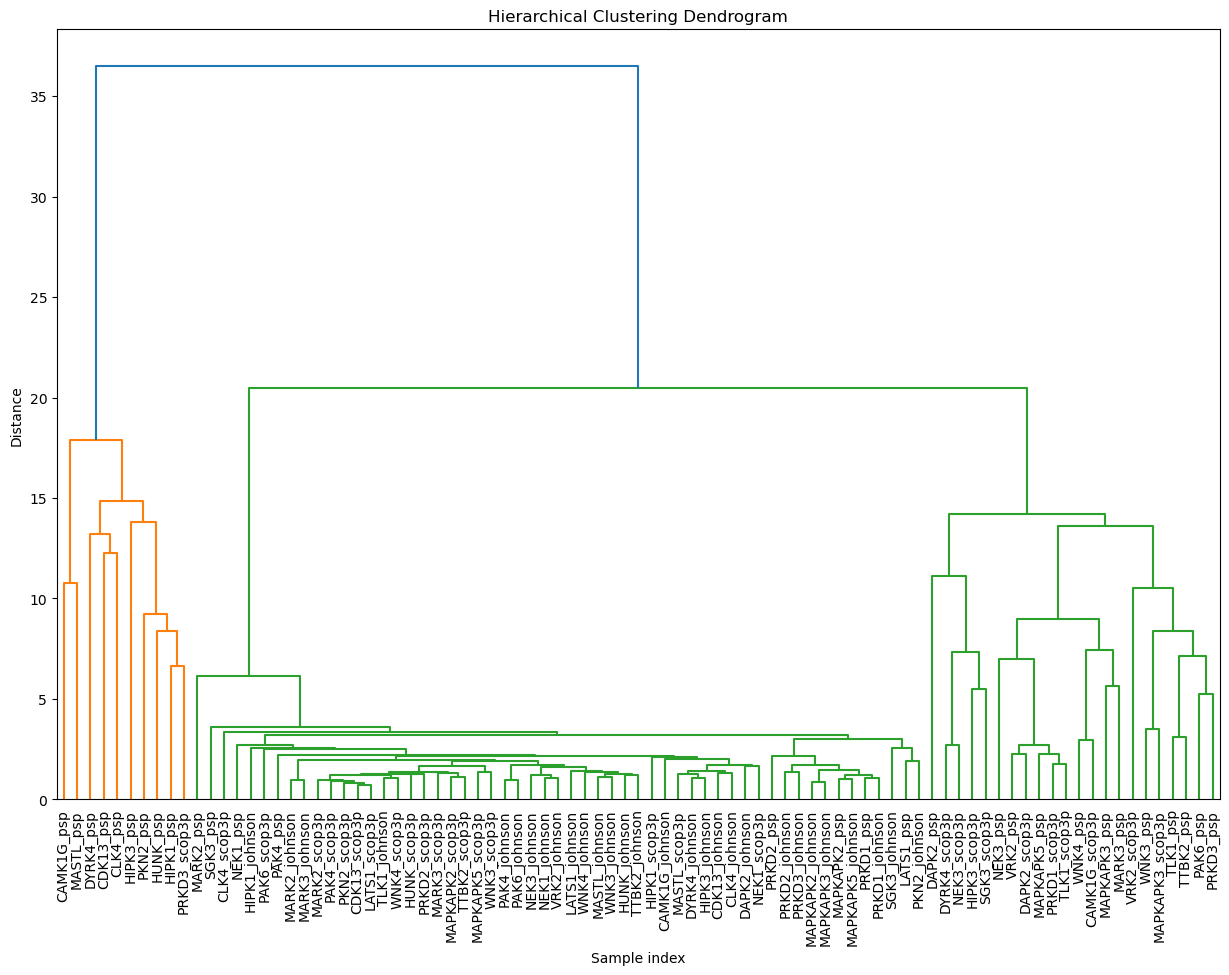

In [276]:
linkage_matrix_common = linkage(data_common, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix_common, labels=data_common.index.values)
plt.title('Hierarchical Clustering Dendrogram')
# increase font size of the x axis 
plt.xticks(fontsize=10)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [273]:
print (data_common)

feature            -7A       -7C       -7D       -7E       -7F       -7G  \
Family                                                                     
CAMK1G_psp   -1.000000 -1.000000  0.000000 -1.000000  0.000000  0.000000   
CDK13_psp     1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CLK4_psp     -1.000000 -1.000000  0.500000  0.000000 -1.000000 -1.000000   
DAPK2_psp     0.000000  0.000000 -1.000000 -1.000000  0.000000  0.000000   
DYRK4_psp    -1.000000 -1.000000 -1.000000  1.000000  0.000000 -1.000000   
...                ...       ...       ...       ...       ...       ...   
TLK1_scop3p   0.047619  0.000000  0.111111  0.027027  0.000000  0.062500   
TTBK2_scop3p  0.033898  0.153846  0.045455  0.080645  0.000000  0.105263   
VRK2_scop3p   0.000000  0.000000  0.000000  0.333333 -1.000000  0.000000   
WNK3_scop3p   0.029412  0.000000  0.030303  0.090909  0.133333  0.100000   
WNK4_scop3p   0.066667  0.166667  0.078431  0.055556  0.058824  0.066667   

feature    

In [274]:
print (linkage_matrix_common)

[[ 59.          66.           0.69895915   2.        ]
 [ 77.          87.           0.83257476   3.        ]
 [ 38.          39.           0.88876436   2.        ]
 [ 75.          88.           0.92128496   4.        ]
 [ 46.          47.           0.9578548    2.        ]
 [ 70.          90.           0.96022796   5.        ]
 [ 41.          42.           0.98718603   2.        ]
 [  9.          40.           1.0194883    2.        ]
 [ 20.          49.           1.0593487    2.        ]
 [ 44.          55.           1.06080898   2.        ]
 [ 53.          86.           1.08170571   2.        ]
 [ 33.          35.           1.08205715   2.        ]
 [ 67.          83.           1.1091449    2.        ]
 [ 43.          56.           1.12797006   2.        ]
 [ 36.          54.           1.20758184   2.        ]
 [ 92.          97.           1.20943231   7.        ]
 [ 45.          96.           1.21105091   3.        ]
 [ 94.          95.           1.23510968   4.        ]
 [ 65.    

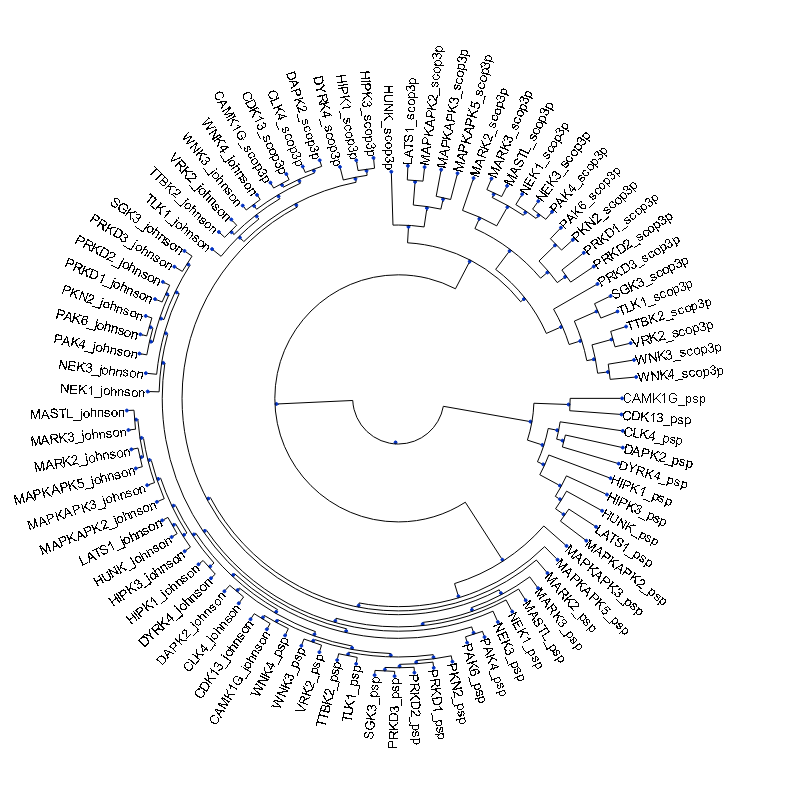

In [280]:
# Ensure the necessary libraries are installed
# !pip install scipy ete3 pandas matplotlib

# Reusing the previously computed linkage_matrix
# linkage_matrix = linkage(data_subset, method='ward') # Already computed

# Convert the linkage matrix to a Newick tree format
def convert_to_newick(linkage_matrix):
    def build_newick(node, parent_dist, leaf_names, newick=''):
        if node.is_leaf():
            return "%s:%f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
        else:
            if newick == '':
                newick = ');'
            else:
                newick = '):%f%s' % (parent_dist - node.dist, newick)
            newick = build_newick(node.get_right(), node.dist, leaf_names, newick)
            newick = build_newick(node.get_left(), node.dist, leaf_names, ',%s' % (newick))
            newick = '(%s' % (newick)
            return newick

    tree = to_tree(linkage_matrix)
    return build_newick(tree, tree.dist, list(map(str, range(len(data)))))

newick_tree = convert_to_newick(linkage_matrix_common)
# print(newick_tree)
# Load the Newick tree using ete3
t = Tree(newick_tree)

# Add leaf names
for i, leaf in enumerate(t.iter_leaves()):
    leaf.name = data_common.index.values[i]
    # print(leaf.name)
# Create a TreeStyle for circular layout
ts = TreeStyle()
ts.mode = "c"
ts.show_leaf_name = True
ts.show_scale = False

# Render the tree
t.render("%%inline", tree_style=ts)


In [277]:
from scipy.cluster import hierarchy

def linkage_to_newick(linkage_matrix):
    def getNewick(node, newick, parentdist, leaf_names):
        if node.is_leaf():
            return f"{leaf_names[node.id]}:{parentdist - node.dist}{newick}"
        else:
            if len(newick) > 0:
                newick = "):%.2f%s" % (parentdist - node.dist, newick)
            else:
                newick = "(%s)" % newick
            return getNewick(node.get_left(), newick, parentdist - node.dist, leaf_names) + getNewick(node.get_right(), newick, parentdist - node.dist, leaf_names)

    tree = hierarchy.to_tree(linkage_matrix)
    leaf_names = [f'leaf{i}' for i in range(len(linkage_matrix) + 1)]
    newick = getNewick(tree, '', 0, leaf_names)
    newick += ";"
    return newick

In [258]:
from scipy.cluster.hierarchy import to_tree

def linkage_to_newick(linkage_matrix):
    def getNewick(node, parentdist, leaf_names, newick=""):
        if node.is_leaf():
            return f"{leaf_names[node.id]}:{parentdist - node.dist}{newick}"
        else:
            if len(newick) > 0:
                newick = f"): {parentdist - node.dist}{newick}"
            else:
                newick = ");"
            newick = getNewick(node.get_left(), node.dist, leaf_names, newick)
            newick = getNewick(node.get_right(), node.dist, leaf_names, f",{newick}")
            newick = f"({newick}"
            return newick
    tree = to_tree(linkage_matrix)
    leaf_names = [f'leaf{i}' for i in range(len(linkage_matrix) + 1)]
    newick = getNewick(tree, tree.dist, leaf_names)
    return newick

In [259]:
newick_tree = linkage_to_newick(linkage_matrix)
print(newick_tree)

(((((((((((((leaf231:3.1251863175647725,leaf119:3.1251863175647725): 0.4434105687562049,leaf284:3.5685968863209774): 4.190340490095126,leaf229:7.758937376416103): 2.8458820445573227,(leaf584:6.658188647296954,leaf360:6.658188647296954): 3.946630773676472): 4.991227100400247,((((leaf773:4.054717871129911,leaf107:4.054717871129911): 1.9504316510090458,leaf226:6.005149522138957): 2.3017425498333495,leaf801:8.306892071972307): 0.6499790376886967,((leaf247:3.506466021216827,leaf79:3.506466021216827): 2.247784317082756,leaf343:5.754250338299583): 3.2026207713614205): 6.639175411712669): 2.327431267052056,((((leaf347:5.832528249179945,leaf26:5.832528249179945): 1.0482214814876594,leaf350:6.880749730667604): 3.9574697395767586,leaf99:10.838219470244363): 1.7767473545484922,((leaf358:5.5134456619218835,leaf214:5.5134456619218835): 2.479968308445221,((leaf726:2.756515108759205,leaf31:2.756515108759205): 0.25964885621465017,leaf402:3.016163964973855): 4.977250005393249): 4.621552854425751): 5.308

In [260]:
from ete3 import Tree

# Parse Newick string
t = Tree(newick_tree, format=1)

# Visualize the tree
t.show()